In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import pandas as pd
import requests
import statsmodels.api as sm
from requests.auth import HTTPBasicAuth

from io import BytesIO

In [2]:
wpi1 = requests.get('http://www.stata-press.com/data/r12/wpi1.dta').content
data = pd.read_stata(BytesIO(wpi1))
data.index = data.t
data = data[['wpi']]

In [3]:
data.describe()

,wpi
count,124.000000
mean,62.774189
std,30.243561
min,30.500000
25%,32.574999
50%,56.600000
75%,96.875002
max,116.199997


In [4]:
data.head()

,wpi
t,
1960-01-01,30.700001
1960-04-01,30.799999
1960-07-01,30.700001
1960-10-01,30.700001
1961-01-01,30.799999


<AxesSubplot:xlabel='t'>

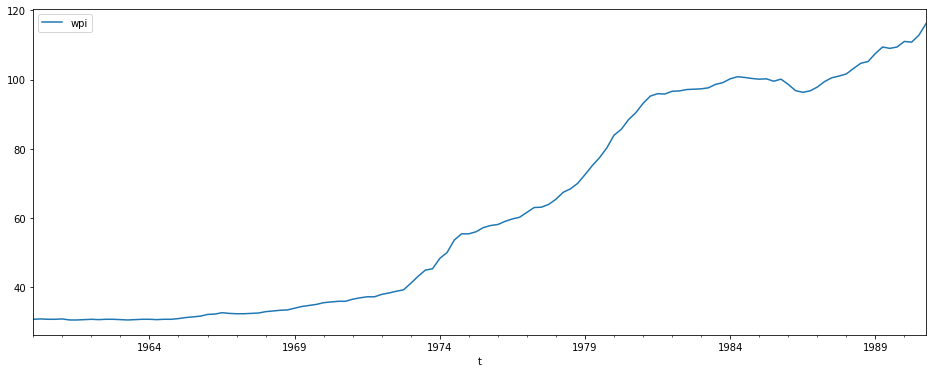

In [5]:
data.plot(figsize = (16, 6))

In [6]:
train_size = int(len(data.index) * 0.9)
df_train, df_test = data.iloc[:train_size], data.iloc[train_size:]
print(df_train.head())
print(df_test.head())

                  wpi
t                    
1960-01-01  30.700001
1960-04-01  30.799999
1960-07-01  30.700001
1960-10-01  30.700001
1961-01-01  30.799999
                   wpi
t                     
1987-10-01  101.000000
1988-01-01  101.599998
1988-04-01  103.199997
1988-07-01  104.699997
1988-10-01  105.199997


In [7]:
model = sm.tsa.SARIMAX(
    df_train,
    seasonal_order=(1, 1, 1, 24),
    order=(1, 0, 0),
    trend=[1, 0, 0],
    enforce_stationarity=False
)
result = model.fit(maxiter=250, disp=10)
result.summary()

/home/jano/miniconda3/envs/byoml_sklearn/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/home/jano/miniconda3/envs/byoml_sklearn/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/home/jano/miniconda3/envs/byoml_sklearn/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  wpi   No. Observations:                  111
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 24)   Log Likelihood                -102.354
Date:                              Fri, 02 Jul 2021   AIC                            214.707
Time:                                      11:29:18   BIC                            225.343
Sample:                                  01-01-1960   HQIC                           218.883
                                       - 07-01-1987                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1039      0.614      3.426      0.001       0.900       3.308
ar.L1          0.9543      0.019     50.382      0.000       0.917       0.991
ar.S.L24      -0.6691      0.239     -2.796      0.005      -1.138      -0.200
ma.S.L24      -0.9788     10.263     -0.095      0.924     -21.094      19.136
sigma2         0.9950     10.181      0.098      0.922     -18.959      20.949
===================================================================================
Ljung-Box (L1) (Q):                  26.59   Jarque-Bera (JB):                 2.00
Prob(Q):                              0.00   Prob(JB):                         0.37
Heteroskedasticity (H):               2.89   Skew:                            -0.25
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/jano/miniconda3/envs/byoml_sklearn/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  wpi   No. Observations:                  111
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 24)   Log Likelihood                -102.354
Date:                              Fri, 02 Jul 2021   AIC                            214.707
Time:                                      11:29:18   BIC                            225.343
Sample:                                  01-01-1960   HQIC                           218.883
                                       - 07-01-1987                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1039      0.614      3.426      0.001       0.900       3.308
ar.L1          0.9543      0.019     50.382      0.000       0.917       0.991
ar.S.L24      -0.6691      0.239     -2.796      0.005      -1.138      -0.200
ma.S.L24      -0.9788     10.263     -0.095      0.924     -21.094      19.136
sigma2         0.9950     10.181      0.098      0.922     -18.959      20.949
===================================================================================
Ljung-Box (L1) (Q):                  26.59   Jarque-Bera (JB):                 2.00
Prob(Q):                              0.00   Prob(JB):                         0.37
Heteroskedasticity (H):               2.89   Skew:                            -0.25
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

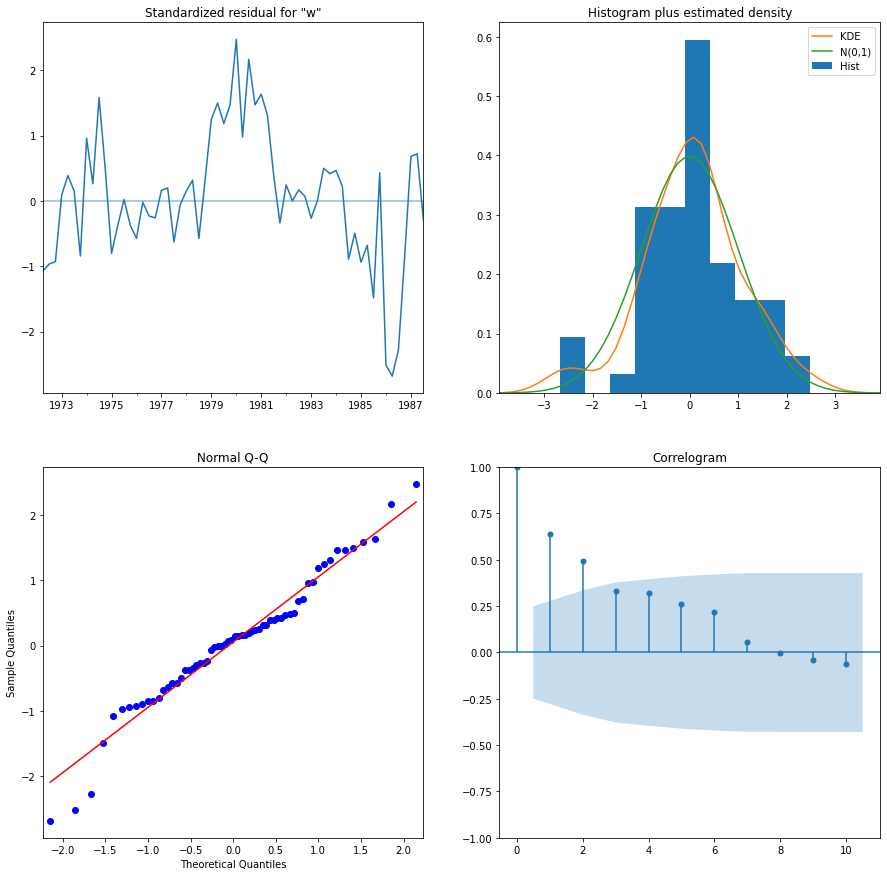

In [8]:
result.plot_diagnostics(figsize=(15, 15))
result.summary()

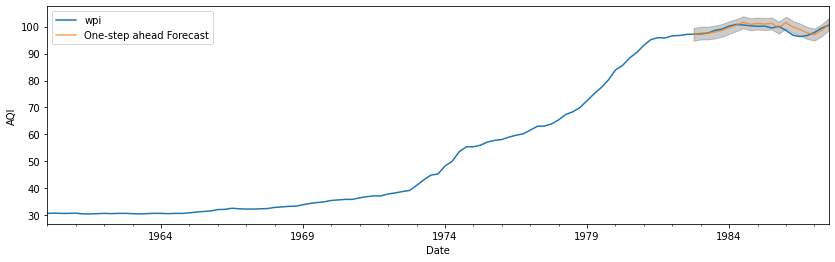

In [9]:
prediction = result.get_prediction(start=-20)
pred_ci = prediction.conf_int()
ax = df_train.plot(label='observed')
prediction.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.legend()
plt.show()

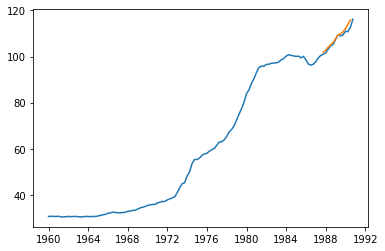

In [10]:
forecast_window = 12
forecast = result.forecast(steps=forecast_window)
plt.plot(
    data.index,
    data.wpi
)
plt.plot(forecast.index, forecast.values)

In [11]:
from waylay import ClientCredentials, WaylayClient, WaylayConfig, RestResponseError

waylay = WaylayClient.from_profile('staging')
waylay.byoml.set_root_url('https://byoml-openfaas-staging.waylay.io')
waylay.byoml.root_url

'https://byoml-openfaas-staging.waylay.io'

In [12]:
MODEL_NAME = 'sarima-model'
try:
    waylay.byoml.model.remove(MODEL_NAME)
except RestResponseError as e:
    display(f'Ignored: {e}')

"Ignored: ByomlActionError(404: 'Model does not exist'; DELETE 'https://byoml-openfaas-staging.waylay.io/models/sarima-model')"

We now create a class around the SARIMA model 

In [13]:
class Forecaster:
    def __init__(self, window=forecast_window):
        self.window = window
        
    def predict(self, data):        
        model = sm.tsa.SARIMAX(
            data,
            seasonal_order=(1, 1, 1, 24),
            order=(1, 0, 0),
            trend=[1, 0, 0],
            enforce_stationarity=False
        )
        result = model.fit(maxiter=250, disp=10)
        
        return result.forecast(steps=self.window)



In [14]:
upload_model = Forecaster()
preds = upload_model.predict(df_train)

/home/jano/miniconda3/envs/byoml_sklearn/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/home/jano/miniconda3/envs/byoml_sklearn/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/home/jano/miniconda3/envs/byoml_sklearn/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


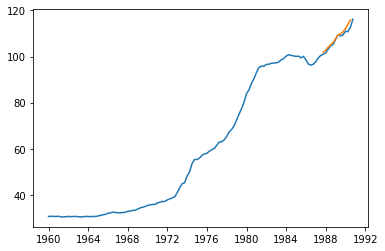

In [15]:
plt.plot(
    data.index,
    data.wpi
)
plt.plot(preds.index, preds.values)

In [16]:
import dill
from zipfile import ZipFile
import tempfile
from pathlib import Path

with tempfile.TemporaryDirectory() as temp_dir:
    model_path = Path(temp_dir, 'model.joblib')
    requirements_file_name = 'requirements.txt'
    
    with open(Path(temp_dir, requirements_file_name), 'wt') as outf:
        outf.write('statsmodels')
        
    with open(model_path, 'wb') as model_file:
        dill.settings['recurse'] = True
        dill.dump(upload_model, model_file)
        
    waylay.byoml.model.upload(
        model_name=MODEL_NAME,
        trained_model=temp_dir, 
        framework='sklearn', 
        description='SARIMA model example'
    )

In [17]:
from time import sleep



result = waylay.byoml.model.get(MODEL_NAME)
is_not_ready = not result.get('ready')

while is_not_ready:
    print('Still waiting on model to be deployed')
    sleep(5)
    result = waylay.byoml.model.get(MODEL_NAME)
    is_not_ready = not result.get('ready')

Still waiting on model to be deployed
Still waiting on model to be deployed
Still waiting on model to be deployed
Still waiting on model to be deployed
Still waiting on model to be deployed
Still waiting on model to be deployed
Still waiting on model to be deployed
Still waiting on model to be deployed
Still waiting on model to be deployed


In [18]:
predictions = waylay.byoml.model.predict(MODEL_NAME, df_train)

In [19]:
predictions

array([101.84982289, 102.7833716 , 104.06221659, 105.14068746,
       106.04357051, 107.79565371, 109.3630994 , 109.86676046,
       110.73503071, 112.22281487, 114.06070121, 115.90187527])

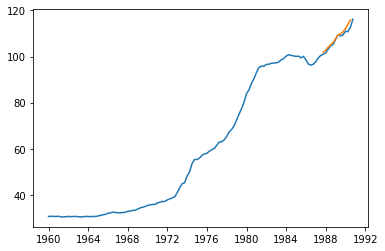

In [20]:
plt.plot(
    data.index,
    data.wpi
)

shifted_data = df_train.index + pd.offsets.DateOffset(years=len(predictions)/4)

plt.plot(
    shifted_data[-12:],
    predictions
)

In [21]:
waylay.byoml.model.get(MODEL_NAME)

{'createdBy': 'users/f0981778-feed-4d08-823e-dc65e2b8a502',
 'createdOn': '2021-07-02T09:29:22.441000+00:00',
 'description': 'SARIMA model example',
 'framework': 'sklearn',
 'framework_version': '0.22',
 'name': 'sarima-model',
 'ready': True,
 'supported_endpoints': ['predict'],
 'updatedBy': 'users/f0981778-feed-4d08-823e-dc65e2b8a502',
 'updatedOn': '2021-07-02T09:29:22.441000+00:00',
 'version': '1'}

In [22]:
waylay.byoml.model.remove(MODEL_NAME)

{'message': 'Model successfully deleted'}